In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
df = pd.read_csv("PreprocessedinR.csv", encoding = "cp1252", low_memory=False)
df.head()

,state,location,agency,type,spm,pm2_5,date,so2,no2,rspm,Day_of_yr,Month,SOi,NOi,RSPMi,SPMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,unknown,"Residential, Rural and other Areas",0.0,0.0,1990-02-01,4.8,17.4,78.182824,32,2,6.000,21.750,0,0.0,21.750,Good
1,Andhra Pradesh,Hyderabad,unknown,Industrial Area,0.0,0.0,1990-02-01,3.1,7.0,78.182824,32,2,3.875,8.750,0,0.0,8.750,Good
2,Andhra Pradesh,Hyderabad,unknown,"Residential, Rural and other Areas",0.0,0.0,1990-02-01,6.2,28.5,78.182824,32,2,7.750,35.625,0,0.0,35.625,Good
3,Andhra Pradesh,Hyderabad,unknown,"Residential, Rural and other Areas",0.0,0.0,1990-03-01,6.3,14.7,78.182824,60,3,7.875,18.375,0,0.0,18.375,Good
4,Andhra Pradesh,Hyderabad,unknown,Industrial Area,0.0,0.0,1990-03-01,4.7,7.5,78.182824,60,3,5.875,9.375,0,0.0,9.375,Good


In [ ]:
df['state'].value_counts()

Maharashtra             60384
Uttar Pradesh           42816
Andhra Pradesh          26368
Punjab                  25634
Rajasthan               25589
Kerala                  24728
Himachal Pradesh        22896
West Bengal             22463
Gujarat                 21279
Tamil Nadu              20597
Madhya Pradesh          19920
Assam                   19361
Odisha                  19279
Karnataka               17119
Delhi                    8551
Chandigarh               8520
Chhattisgarh             7831
Goa                      6206
Jharkhand                5968
Mizoram                  5338
Telangana                3978
Meghalaya                3853
Puducherry               3785
Haryana                  3420
Nagaland                 2463
Bihar                    2275
Uttarakhand              1961
Jammu & Kashmir          1289
Daman & Diu               782
Dadra & Nagar Haveli      634
Uttaranchal               285
Arunachal Pradesh          90
Manipur                    76
Sikkim    

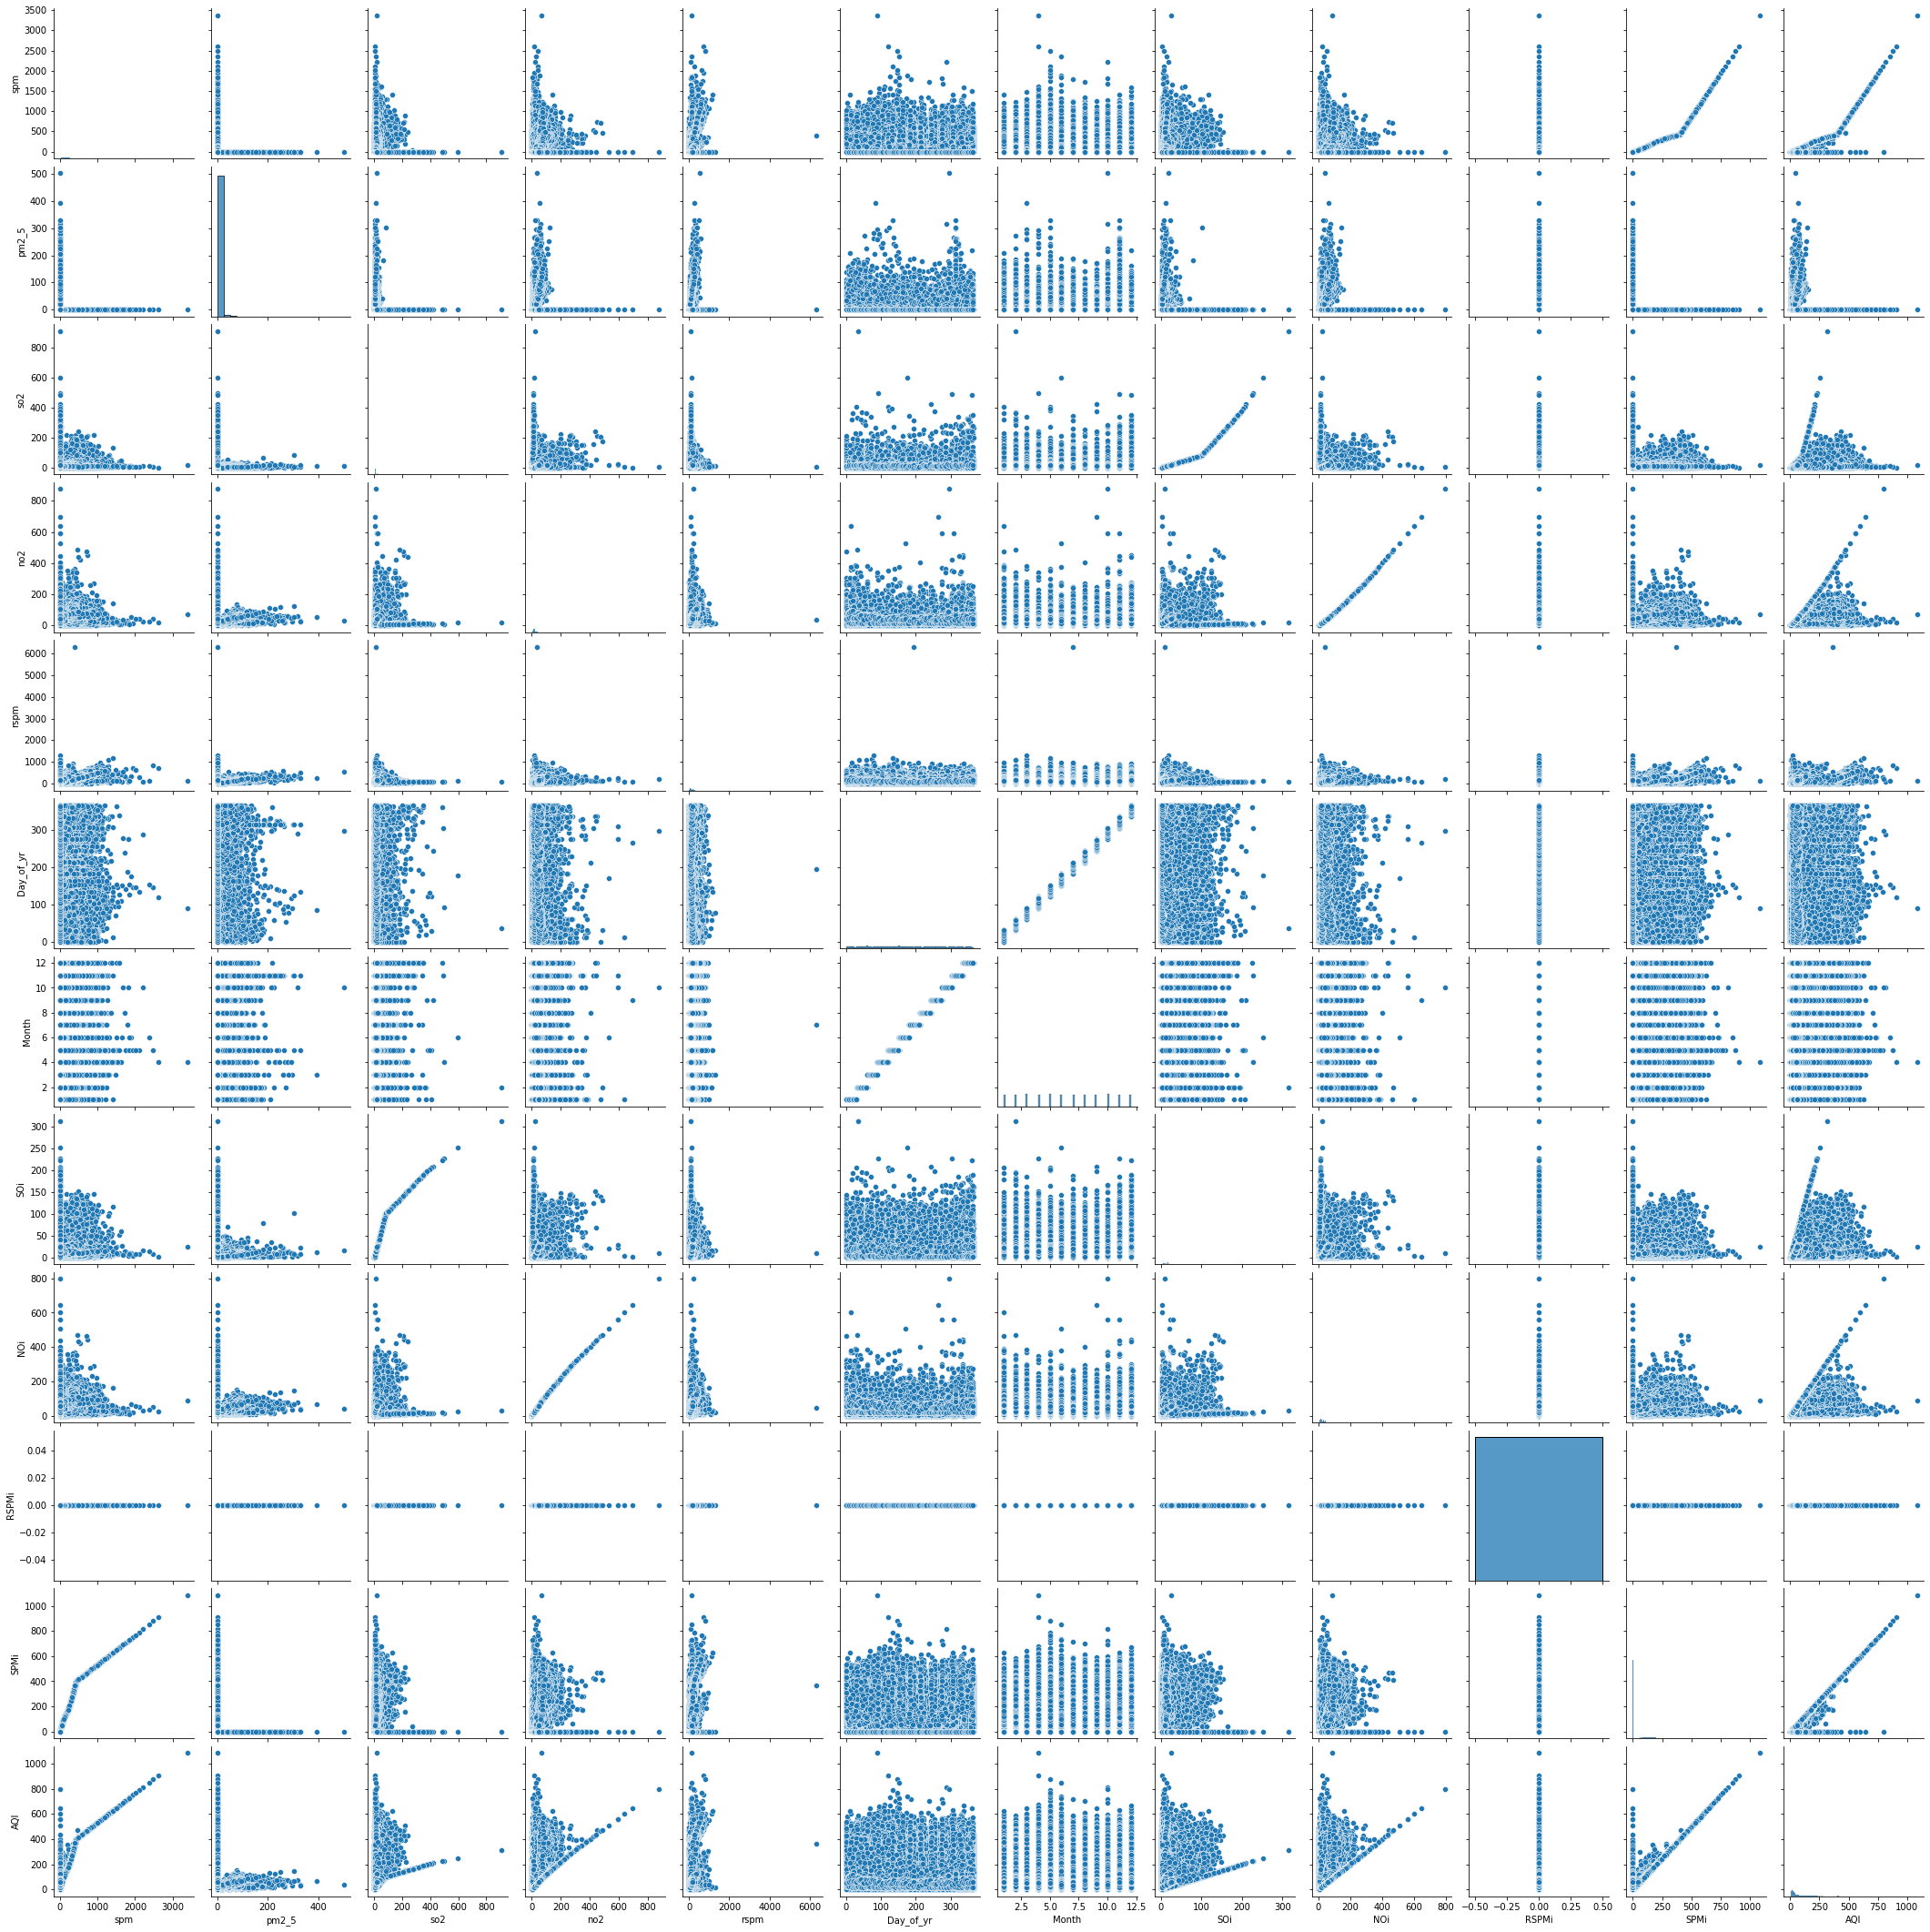

In [ ]:
sns.pairplot(data = df)

In [ ]:
#MODELS:
#REGRESSION MODELS.
df.rename(columns = {"Day_of_yr":"Day_Of_Year"}, inplace=True)
df.rename(columns = {"RSPMi":"Rpi"}, inplace=True)
df.head()

,state,location,agency,type,spm,pm2_5,date,so2,no2,rspm,Day_Of_Year,Month,SOi,NOi,Rpi,SPMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,unknown,"Residential, Rural and other Areas",0.0,0.0,1990-02-01,4.8,17.4,78.182824,32,2,6.000,21.750,0,0.0,21.750,Good
1,Andhra Pradesh,Hyderabad,unknown,Industrial Area,0.0,0.0,1990-02-01,3.1,7.0,78.182824,32,2,3.875,8.750,0,0.0,8.750,Good
2,Andhra Pradesh,Hyderabad,unknown,"Residential, Rural and other Areas",0.0,0.0,1990-02-01,6.2,28.5,78.182824,32,2,7.750,35.625,0,0.0,35.625,Good
3,Andhra Pradesh,Hyderabad,unknown,"Residential, Rural and other Areas",0.0,0.0,1990-03-01,6.3,14.7,78.182824,60,3,7.875,18.375,0,0.0,18.375,Good
4,Andhra Pradesh,Hyderabad,unknown,Industrial Area,0.0,0.0,1990-03-01,4.7,7.5,78.182824,60,3,5.875,9.375,0,0.0,9.375,Good


In [ ]:
X=df[['SOi','Rpi','SPMi', 'Month', 'Day_Of_Year']]
y=df['AQI']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=70)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
#Linear regression

model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#predicting train
train_pred=model.predict(X_train)
#predicting on test
test_pred=model.predict(X_test)
RMSE_train=(np.sqrt(metrics.mean_squared_error(y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('RSquared value on train:',model.score(X_train, y_train))
print('RSquared value on test:',model.score(X_test, y_test))

RMSE TrainingData =  17.6508942908371
RMSE TestData =  17.4997174796473
RSquared value on train: 0.9744128840747625
RSquared value on test: 0.9746946540591024


In [ ]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()
rf.fit(X_train,y_train)
rf_train_preds=rf.predict(X_train)
#predicting on test
rf_test_preds=rf.predict(X_test)
RMSE_train=(np.sqrt(metrics.mean_squared_error(y_train,rf_train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(y_test,rf_test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('RSquared value on train:',rf.score(X_train, y_train))
print('RSquared value on test:',rf.score(X_test, y_test))

RMSE TrainingData =  12.43450104788555
RMSE TestData =  13.940180764801191
RSquared value on train: 0.9873017277154224
RSquared value on test: 0.9839421641232914


In [ ]:
#CLASSIFICATION MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
df.columns
df_new = df

from sklearn.preprocessing import LabelEncoder
featurecols = ['state', 'location', 'agency', 'type']
enc = LabelEncoder()
df[featurecols] = df[featurecols].apply(enc.fit_transform)


In [ ]:
X2 = df[['SOi','Rpi','SPMi','state', 'location', 'agency', 'type', 'Month', 'Day_Of_Year']]
y2 = df['AQI_Range']
y2.head()
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y2 = enc.fit_transform(y2)
from sklearn.model_selection import train_test_split
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=70)

In [ ]:
#LOGISTIC REGRESSION
 
log_reg = LogisticRegression()
log_reg.fit(X_train2, Y_train2)

 
logreg_train_preds = log_reg.predict(X_train2)
print("Model accuracy on train is: ", accuracy_score(Y_train2, logreg_train_preds))


logreg_test_preds = log_reg.predict(X_test2)
print("Model accuracy on test is: ", accuracy_score(Y_test2, logreg_test_preds))

# Kappa Score.
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,logreg_test_preds))


Model accuracy on train is:  0.7948158529271367
Model accuracy on test is:  0.794951117638959
KappaScore is:  0.6875338334686758


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#RANDOMFOREST CLASSIFIER


RF=RandomForestClassifier()
RF.fit(X_train2,Y_train2)

RF_train_preds = RF.predict(X_train2)
print("Model accuracy on train is: ", accuracy_score(Y_train2, RF_train_preds))

RF_test_preds = RF.predict(X_test2)
print("Model accuracy on test is: ", accuracy_score(Y_test2, RF_test_preds))

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,RF_test_preds))

Model accuracy on train is:  0.9960465600176253
Model accuracy on test is:  0.9606921558727681
KappaScore is:  0.9416550141124401


In [ ]:
#KNN

KNN = KNeighborsClassifier()
KNN.fit(X_train2,Y_train2)

knn_tr_preds = KNN.predict(X_train2)
print("Model accuracy on train is: ", accuracy_score(Y_train2, knn_tr_preds))

knn_test_preds = KNN.predict(X_test2)
print("Model accuracy on test is: ", accuracy_score(Y_test2, knn_test_preds))

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,knn_test_preds))

Model accuracy on train is:  0.9613682819059742
Model accuracy on test is:  0.943975765364667
KappaScore is:  0.9165512272318669


In [ ]:
#Weighted KNN
from sklearn.neighbors import KNeighborsClassifier

we_knn = KNeighborsClassifier(n_neighbors=4)
we_knn.fit(X_train2, Y_train2)

we_knn_tr_preds = we_knn.predict(X_train2)
print("Model accuracy on train is: ", accuracy_score(Y_train2, we_knn_tr_preds))

we_knn_test_preds = we_knn.predict(X_test2)
print("Model accuracy on test is: ", accuracy_score(Y_test2, we_knn_test_preds))

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,we_knn_test_preds))

Model accuracy on train is:  0.9606706160267316
Model accuracy on test is:  0.9419929315646945
KappaScore is:  0.9131206152080292


In [ ]:
#Neural Netwok (ANN) (Regression)
print(len(df))

435739


In [ ]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
X_train.shape
model = Sequential()
model.add(Dense(6, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(6, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(3, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(3, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='linear'))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

In [ ]:
model.fit(x = X_train, y = y_train, epochs = 600, batch_size = 256, validation_data = (X_test, y_test), callbacks = [early_stop])

Epoch 1/600
1362/1362 [==============================] - 9s 4ms/step - loss: 8413.6055 - val_loss: 3160.4590
Epoch 2/600
1362/1362 [==============================] - 4s 3ms/step - loss: 6281.9878 - val_loss: 2994.1458
Epoch 3/600
1362/1362 [==============================] - 2s 2ms/step - loss: 5946.4282 - val_loss: 3242.0049
Epoch 4/600
1362/1362 [==============================] - 2s 2ms/step - loss: 5800.6436 - val_loss: 3325.6438
Epoch 5/600
1362/1362 [==============================] - 3s 2ms/step - loss: 5574.3237 - val_loss: 2696.6270
Epoch 6/600
1362/1362 [==============================] - 3s 2ms/step - loss: 5451.8247 - val_loss: 3024.8948
Epoch 7/600
1362/1362 [==============================] - 2s 2ms/step - loss: 5258.9893 - val_loss: 3168.4563
Epoch 8/600
1362/1362 [==============================] - 2s 2ms/step - loss: 5211.5654 - val_loss: 2583.5579
Epoch 9/600
1362/1362 [==============================] - 3s 2ms/step - loss: 5098.3564 - val_loss: 2806.2703
Epoch 10/600
1362/1

<Axes: >

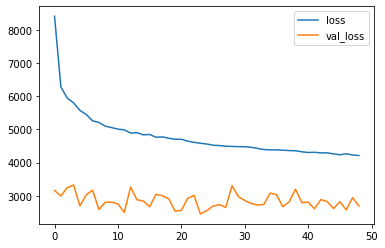

In [ ]:
pd.DataFrame(model.history.history).plot()

In [ ]:
preds = model.predict(X_test)
mean_squared_error(y_test, preds)

2724/2724 [==============================] - 3s 957us/step


2692.853968736255

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y2 = enc.fit_transform(y2)
model2 = Sequential()
model2.add(Dense(10, activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(10, activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(10, activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(5, activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(5, activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(units=6,activation='softmax'))
model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
print(df_new.AQI_Range.unique())

['Good' 'Poor' 'Moderate' 'Unhealthy' 'Very Unhealthy' 'Hazardous']


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)
model2.fit(x = X_train2, y = Y_train2, epochs = 600, batch_size = 256, validation_data = (X_test2, Y_test2), callbacks = [early_stop])

Epoch 1/600
1277/1277 [==============================] - 5s 3ms/step - loss: 1.8511 - accuracy: 0.4807 - val_loss: 1.3801 - val_accuracy: 0.5023
Epoch 2/600
1277/1277 [==============================] - 3s 3ms/step - loss: 1.3756 - accuracy: 0.5043 - val_loss: 1.2406 - val_accuracy: 0.5023
Epoch 3/600
1277/1277 [==============================] - 4s 3ms/step - loss: 1.1223 - accuracy: 0.6181 - val_loss: 0.7533 - val_accuracy: 0.7088
Epoch 4/600
1277/1277 [==============================] - 3s 3ms/step - loss: 0.9033 - accuracy: 0.6831 - val_loss: 0.6441 - val_accuracy: 0.7753
Epoch 5/600
1277/1277 [==============================] - 3s 3ms/step - loss: 0.8433 - accuracy: 0.6966 - val_loss: 0.6044 - val_accuracy: 0.7262
Epoch 6/600
1277/1277 [==============================] - 3s 3ms/step - loss: 0.7966 - accuracy: 0.7164 - val_loss: 0.5790 - val_accuracy: 0.7764
Epoch 7/600
1277/1277 [==============================] - 3s 3ms/step - loss: 0.7734 - accuracy: 0.7265 - val_loss: 0.5660 - val_ac

<Axes: >

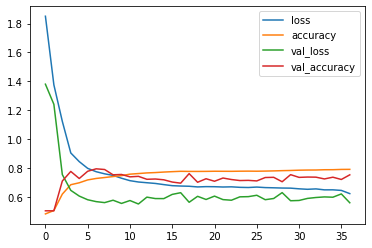

In [ ]:
pd.DataFrame(model2.history.history).plot() #Correct one 84 and 87 acc

In [ ]:
#Ridge Regression

from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

#define cross validation method to evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

model = RidgeCV(alphas=np.arange(0.01, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')

model.fit(X_train, y_train)

print(model.alpha_)

0.01


In [ ]:
ridge_train_preds = model.predict(X_train)
ridge_test_preds = model.predict(X_test)

RMSE_train=(np.sqrt(metrics.mean_squared_error(y_train,ridge_train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(y_test,ridge_test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('RSquared value on train:',model.score(X_train, y_train))
print('RSquared value on test:',model.score(X_test, y_test))

RMSE TrainingData =  17.6508942908371
RMSE TestData =  17.49971748068429
RSquared value on train: 0.9744128840747625
RSquared value on test: 0.9746946540561033


In [ ]:
#Ridge Classification
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import cross_val_score

rc = RidgeClassifier()

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,max_iter=None,  random_state=None, solver='auto',tol=0.001)

rc.fit(X_train2, Y_train2)

train_score = rc.score(X_train2, Y_train2)
print("Train data Score: ", train_score)

test_score = rc.score(X_test2, Y_test2)
print("Test data score: ", test_score)

cv_scores = cross_val_score(rc, X_train2, Y_train2, cv=10)
print("CV average score: %.2f" % cv_scores.mean())
from sklearn.metrics import confusion_matrix, classification_report

rc_preds = rc.predict(X_test2)

cm = confusion_matrix(Y_test2, rc_preds)
cr = classification_report(Y_test2, rc_preds)

print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,rc_preds))

Train data Score:  0.6625133107305908
Test data score:  0.6624133657685776
CV average score: 0.66
KappaScore is:  0.4335480085743879


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Lasso
from sklearn.linear_model import LassoCV
lasso = LassoCV(cv=3)

lasso.fit(X_train, y_train)

lasso_tr = lasso.score(X_train, y_train)
lasso_test = lasso.score(X_test, y_test)

lasso_tr_preds = lasso.predict(X_train)
lasso_test_preds = lasso.predict(X_test)

RMSE_train=(np.sqrt(metrics.mean_squared_error(y_train,lasso_tr_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(y_test,lasso_test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('RSquared value on train:',lasso_tr)
print('RSquared value on test:',lasso_test)

RMSE TrainingData =  17.695063506187353
RMSE TestData =  17.538356233517774
RSquared value on train: 0.9742846665621153
RSquared value on test: 0.9745827840849757


In [ ]:
#AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100)
ada_score_tr = cross_val_score(ada, X_train2, Y_train2, cv = 5)
ada_score_test = cross_val_score(ada, X_test2, Y_test2, cv = 5)

ada.fit(X_train2, Y_train2)
preds = ada.predict(X_test2)
preds_train = ada.predict(X_train2)

cm = confusion_matrix(Y_test2,preds)
cm

print("Model accuracy on test is: ", accuracy_score(Y_test2, preds))
print("Model accuracy on train is: ", accuracy_score(Y_train2, preds_train))

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,preds))

Model accuracy on test is:  0.5615642355533116
Model accuracy on train is:  0.5637415698706258
KappaScore is:  0.3941366811774061


In [ ]:
#XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train2, Y_train2)

preds_test = xgb.predict(X_test2)

accuracy = accuracy_score(Y_test2, preds_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,preds_test))

Accuracy: 96.38%
KappaScore is:  0.9460208841550044


In [ ]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(100, 50, 25), activation='relu', solver='adam', max_iter=500)
# Train the MLP regressor algorithm
mlp.fit(X_train2, Y_train2)
# Use the trained model to make predictions on the test data
y_pred = mlp.predict(X_test2)
# Calculate the mean squared error

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test2, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.1475707679278528


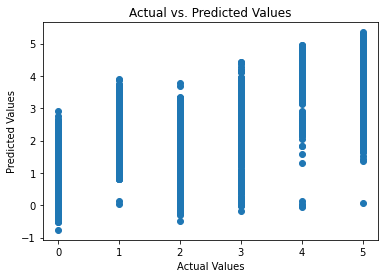

In [ ]:
# Visualize the predicted values against the actual values
import matplotlib.pyplot as plt

plt.scatter(Y_test2, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

Epoch 1/15
21787/21787 [==============================] - 92s 4ms/step - loss: 813.7983 - val_loss: 222.9338
Epoch 2/15
21787/21787 [==============================] - 82s 4ms/step - loss: 210.8886 - val_loss: 200.0898
Epoch 3/15
21787/21787 [==============================] - 89s 4ms/step - loss: 203.6441 - val_loss: 196.8519
Epoch 4/15
21787/21787 [==============================] - 128s 6ms/step - loss: 199.2460 - val_loss: 194.8392
Epoch 5/15
21787/21787 [==============================] - 104s 5ms/step - loss: 196.4601 - val_loss: 195.2504
Epoch 6/15
21787/21787 [==============================] - 78s 4ms/step - loss: 194.9589 - val_loss: 199.2679
Epoch 7/15
21787/21787 [==============================] - 82s 4ms/step - loss: 193.6713 - val_loss: 196.4934
Epoch 8/15
21787/21787 [==============================] - 81s 4ms/step - loss: 192.9534 - val_loss: 197.1537
Epoch 9/15
21787/21787 [==============================] - 80s 4ms/step - loss: 192.2565 - val_loss: 191.7467
Epoch 10/15
21787

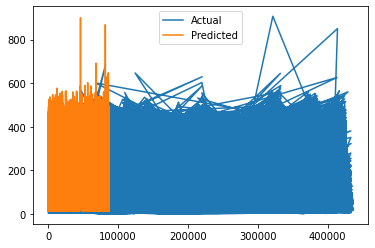

In [ ]:
# Prepare the data
X=df[['SOi','Rpi','SPMi', 'Month', 'Day_Of_Year']]
y=df['AQI']

# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input data for the RNN model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Create the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=15, batch_size=16, validation_data=(X_test, y_test))

# Make predictions
y_pred = model.predict(X_test)
# Visualize the results
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [ ]:
X=df[['SOi','Rpi','SPMi', 'Month', 'Day_Of_Year']]
y=df['AQI']
!pip install xgboost
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=70)



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Train the Ridge regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

In [ ]:
# Train the KNN model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
# Train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [ ]:
# Train the XGBoost regression model
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.05, gamma=0, subsample=0.7, colsample_bytree=1, max_depth=10)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
# Make predictions using all five models and combine them
ridge_preds = ridge.predict(X_test)
knn_preds = knn.predict(X_test)
rf_preds = rf.predict(X_test)
xgb_preds = xgb.predict(X_test)
ensemble_preds = (0.05 * ridge_preds) + (0.05 * knn_preds) + (0.85 * rf_preds) + (0.05 * xgb_preds)

# Calculate MSE for individual models and ensemble model
ridge_mse = mean_squared_error(y_test, ridge_preds)
knn_mse = mean_squared_error(y_test, knn_preds)
rf_mse = mean_squared_error(y_test, rf_preds)
xgb_mse = mean_squared_error(y_test, xgb_preds)
ensemble_mse = mean_squared_error(y_test, ensemble_preds)

# Print MSE for individual models and ensemble model
print("Ridge MSE: {:.2f}".format(ridge_mse))
print("KNN MSE: {:.2f}".format(knn_mse))
print("Random Forest MSE: {:.2f}".format(rf_mse))
print("XGBoost MSE: {:.2f}".format(xgb_mse))
print("Ensemble MSE: {:.2f}".format(ensemble_mse))

Ridge MSE: 306.24
KNN MSE: 213.74
Random Forest MSE: 181.24
XGBoost MSE: 186.71
Ensemble MSE: 181.07


In [ ]:
# Calculate RMSE for individual models and ensemble model
ridge_rmse = np.sqrt(ridge_mse)
knn_rmse = np.sqrt(knn_mse)
rf_rmse = np.sqrt(rf_mse)
xgb_rmse = np.sqrt(xgb_mse)
ensemble_rmse = np.sqrt(ensemble_mse)

# Calculate R-squared for individual models and ensemble model
ridge_r2 = r2_score(y_test, ridge_preds)
knn_r2 = r2_score(y_test, knn_preds)
rf_r2 = r2_score(y_test, rf_preds)
xgb_r2 = r2_score(y_test, xgb_preds)
ensemble_r2 = r2_score(y_test, ensemble_preds)

# Print RMSE and R-squared for individual models and ensemble model
print("Ridge RMSE: {:.2f}, R-squared: {:.8f}".format(ridge_rmse, ridge_r2))
print("KNN RMSE: {:.2f}, R-squared: {:.8f}".format(knn_rmse, knn_r2))
print("Random Forest RMSE: {:.2f}, R-squared: {:.8f}".format(rf_rmse, rf_r2))
print("XGBoost RMSE: {:.2f}, R-squared: {:.8f}".format(xgb_rmse, xgb_r2))
print("Ensemble RMSE: {:.2f}, R-squared: {:.8f}".format(ensemble_rmse, ensemble_r2))

Ridge RMSE: 17.50, R-squared: 0.97469465
KNN RMSE: 14.62, R-squared: 0.98233851
Random Forest RMSE: 13.46, R-squared: 0.98502404
XGBoost RMSE: 13.66, R-squared: 0.98457143
Ensemble RMSE: 13.46, R-squared: 0.98503767
